<a href="https://colab.research.google.com/github/daffu081/Future_DS_01/blob/main/Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data science/Future Interns/sentimentdataset.csv')
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [3]:
# Handle missing values
df.dropna(inplace=True)

# Convert text to lowercase
df['Text'] = df['Text'].str.lower()

# Remove punctuation (example using regex)
df['Text'] = df['Text'].str.replace('[^\w\s]', '', regex=True)

# Remove numbers (example using regex)
df['Text'] = df['Text'].str.replace('\d+', '', regex=True)

# Basic tokenization (split by whitespace)
df['tokens'] = df['Text'].str.split()

print("\nData after preprocessing:")
print(df.head())


Data after preprocessing:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   enjoying a beautiful day at the park         ...   Positive     
1   traffic was terrible this morning            ...   Negative     
2   just finished an amazing workout                   Positive     
3   excited about the upcoming weekend getaway   ...   Positive     
4   trying out a new recipe for dinner tonight   ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Has

In [4]:
# prompt: Sentiment Analysis with TextBlob (if not already labeled)

!pip install textblob

from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
  analysis = TextBlob(text)
  # Return the polarity score (-1 to 1)
  return analysis.sentiment.polarity

# Apply the sentiment analysis
df['sentiment_score'] = df['Text'].apply(get_sentiment)

# Categorize sentiment based on the score
def categorize_sentiment(score):
  if score > 0:
    return 'positive'
  elif score < 0:
    return 'negative'
  else:
    return 'neutral'

df['sentiment_label'] = df['sentiment_score'].apply(categorize_sentiment)

print("\nData after TextBlob sentiment analysis:")
print(df[['Text', 'sentiment_score', 'sentiment_label']].head())


Data after TextBlob sentiment analysis:
                                                Text  sentiment_score  \
0   enjoying a beautiful day at the park         ...         0.675000   
1   traffic was terrible this morning            ...        -1.000000   
2   just finished an amazing workout                         0.600000   
3   excited about the upcoming weekend getaway   ...         0.375000   
4   trying out a new recipe for dinner tonight   ...         0.136364   

  sentiment_label  
0        positive  
1        negative  
2        positive  
3        positive  
4        positive  


<ipython-input-5-3d5bf35e3da8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis')


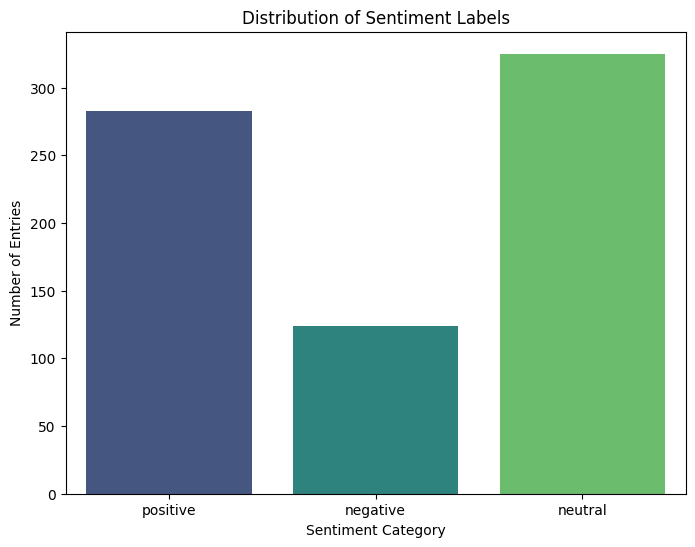

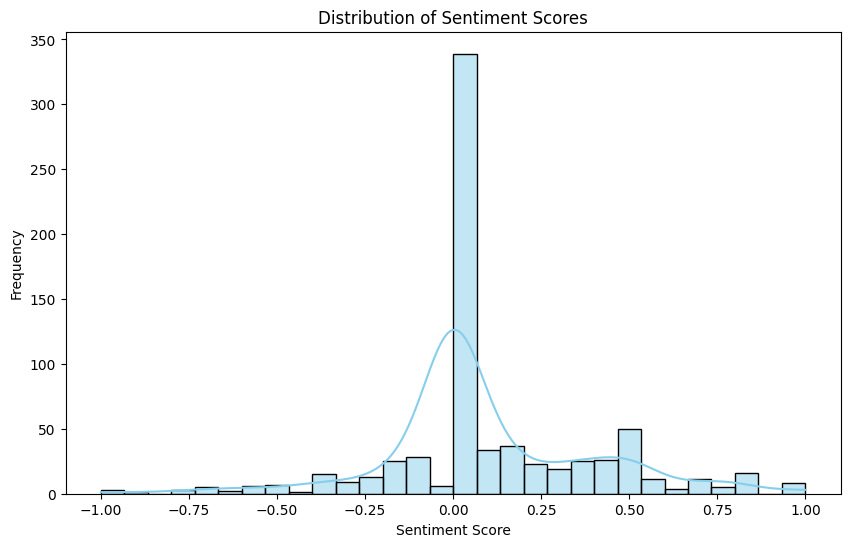

In [5]:
# prompt: Sentiment Distribution Plot

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Entries')
plt.show()

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()



Available Platforms: [' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']

Mean Sentiment Score by Platform:
      Platform  sentiment_score
0    Facebook          0.082204
1   Instagram          0.107448
2     Twitter          0.123020
3    Twitter           0.053177

Sentiment Label Counts by Platform:
sentiment_label     Platform  negative  neutral  positive
0                  Facebook         40      113        78
1                 Instagram         35      110       113
2                   Twitter         25       50        53
3                  Twitter          24       52        39


<ipython-input-6-278bed83983e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='sentiment_score', data=platform_sentiment, palette='coolwarm')


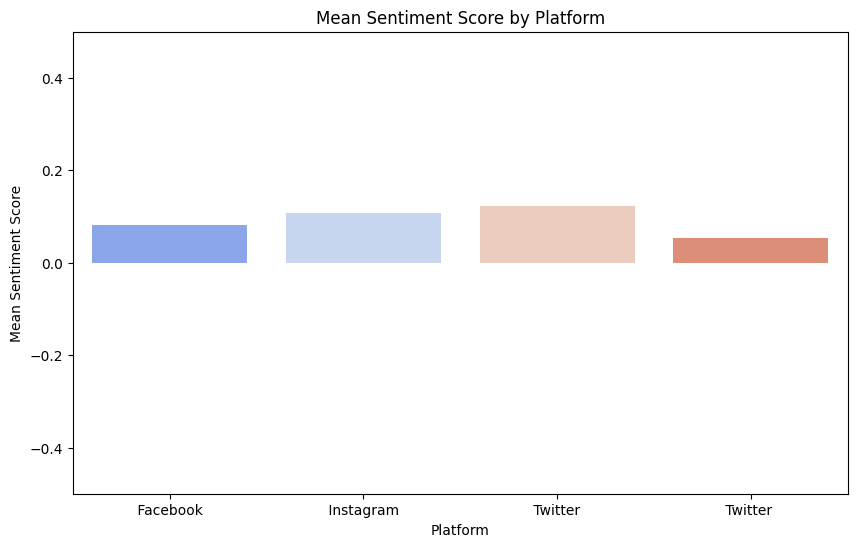

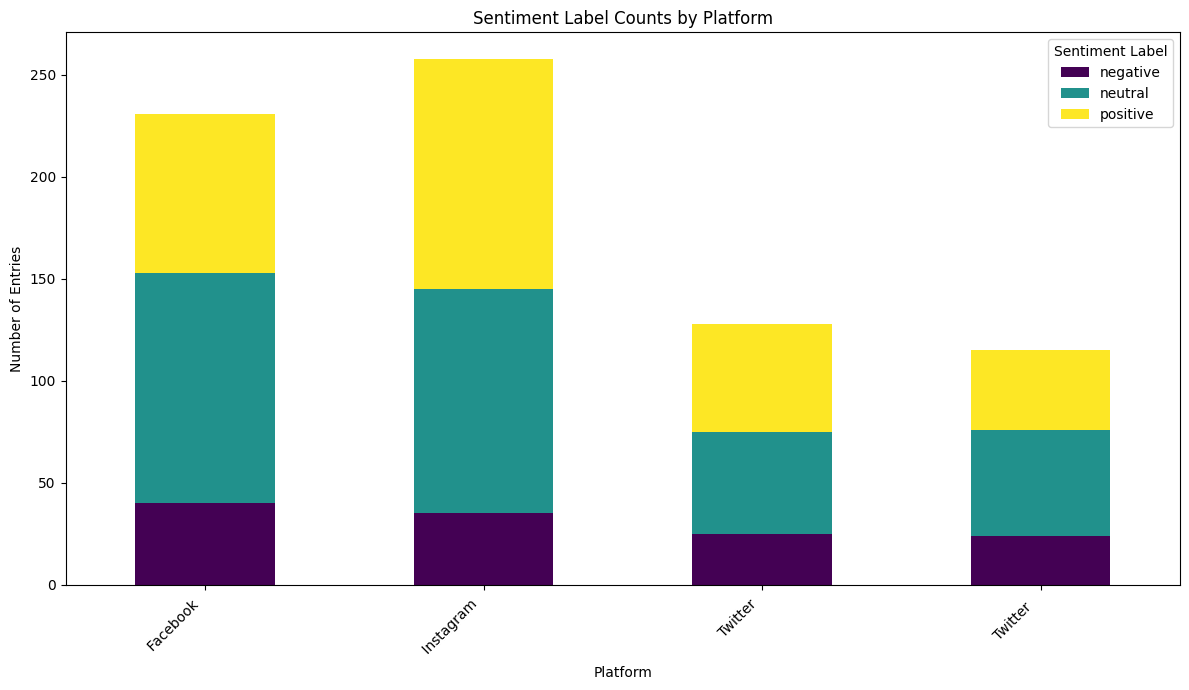

In [6]:


# Check the available platforms
print("\nAvailable Platforms:", df['Platform'].unique())

# Group by platform and calculate the mean sentiment score and count of each sentiment label
platform_sentiment = df.groupby('Platform')['sentiment_score'].mean().reset_index()
platform_sentiment_counts = df.groupby(['Platform', 'sentiment_label']).size().unstack(fill_value=0).reset_index()

print("\nMean Sentiment Score by Platform:")
print(platform_sentiment)

print("\nSentiment Label Counts by Platform:")
print(platform_sentiment_counts)

# Plot the mean sentiment score by platform
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='sentiment_score', data=platform_sentiment, palette='coolwarm')
plt.title('Mean Sentiment Score by Platform')
plt.xlabel('Platform')
plt.ylabel('Mean Sentiment Score')
plt.ylim(-0.5, 0.5) # Adjust limits based on expected scores
plt.show()

# Plot the sentiment label counts by platform
platform_sentiment_counts.set_index('Platform').plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Sentiment Label Counts by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

In [7]:
# prompt: Generate Hashtag Word Cloud

!pip install wordcloud

from wordcloud import WordCloud

# Extract hashtags
def extract_hashtags(text):
  hashtags = []
  for word in text.split():
    if word.startswith('#'):
      hashtags.append(word[1:]) # Remove the '#'
  return hashtags

df['hashtags'] = df['Text'].apply(extract_hashtags)

# Flatten the list of hashtags and join them into a single string
all_hashtags = [hashtag for sublist in df['hashtags'] for hashtag in sublist]
all_hashtags_string = ' '.join(all_hashtags)

# Generate the word cloud
if all_hashtags_string: # Check if there are any hashtags
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10).generate(all_hashtags_string)

    # Plot the word cloud
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title('Hashtag Word Cloud')
    plt.show()
else:
    print("No hashtags found in the text data.")


No hashtags found in the text data.



Mean Sentiment Score by Country:
                 Country  sentiment_score
0             Australia          0.051874
1            Australia           0.519318
2           Australia            0.150000
3          Australia             0.027778
4         Australia              0.040000
..                   ...              ...
110        USA                   0.026389
111       USA                    0.000000
112     USA                      0.000000
113   USA                        0.283333
114                  USA         0.084596

[115 rows x 2 columns]

Sentiment Label Counts by Country:
sentiment_label              Country  negative  neutral  positive
0                         Australia          6       23        12
1                        Australia           0        0         2
2                       Australia            1        3         1
3                      Australia             2        8         2
4                     Australia              3        1         1
..    

<ipython-input-8-91e85cd4617f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='sentiment_score', data=country_sentiment, palette='coolwarm')


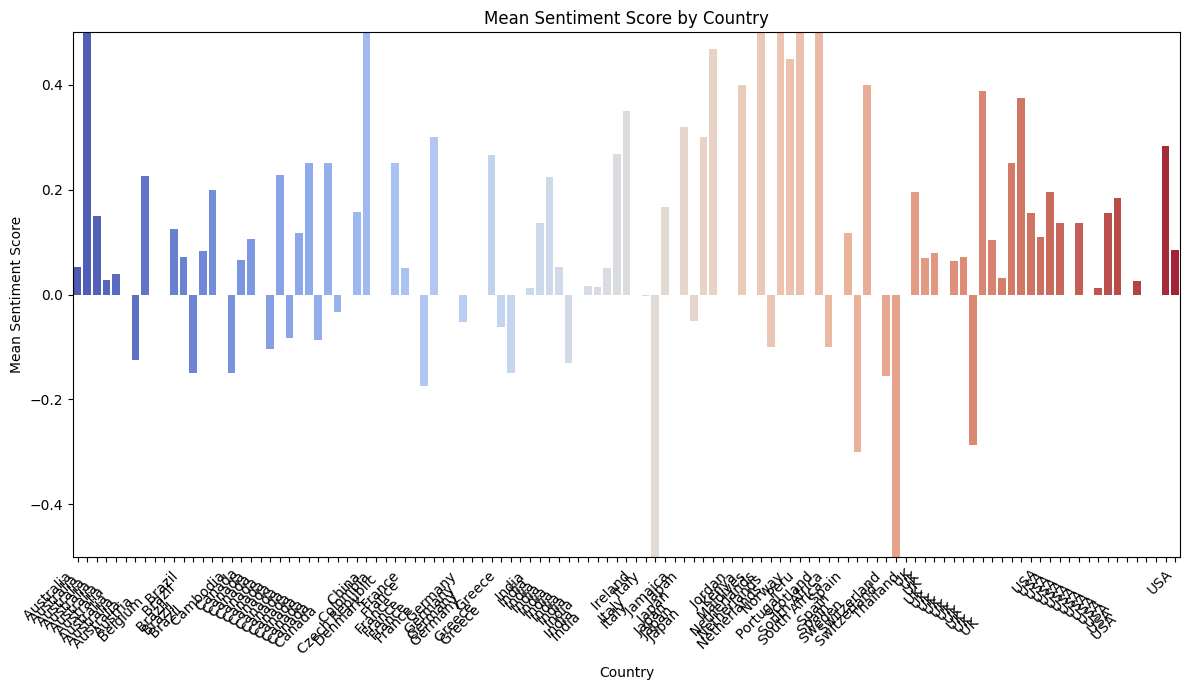

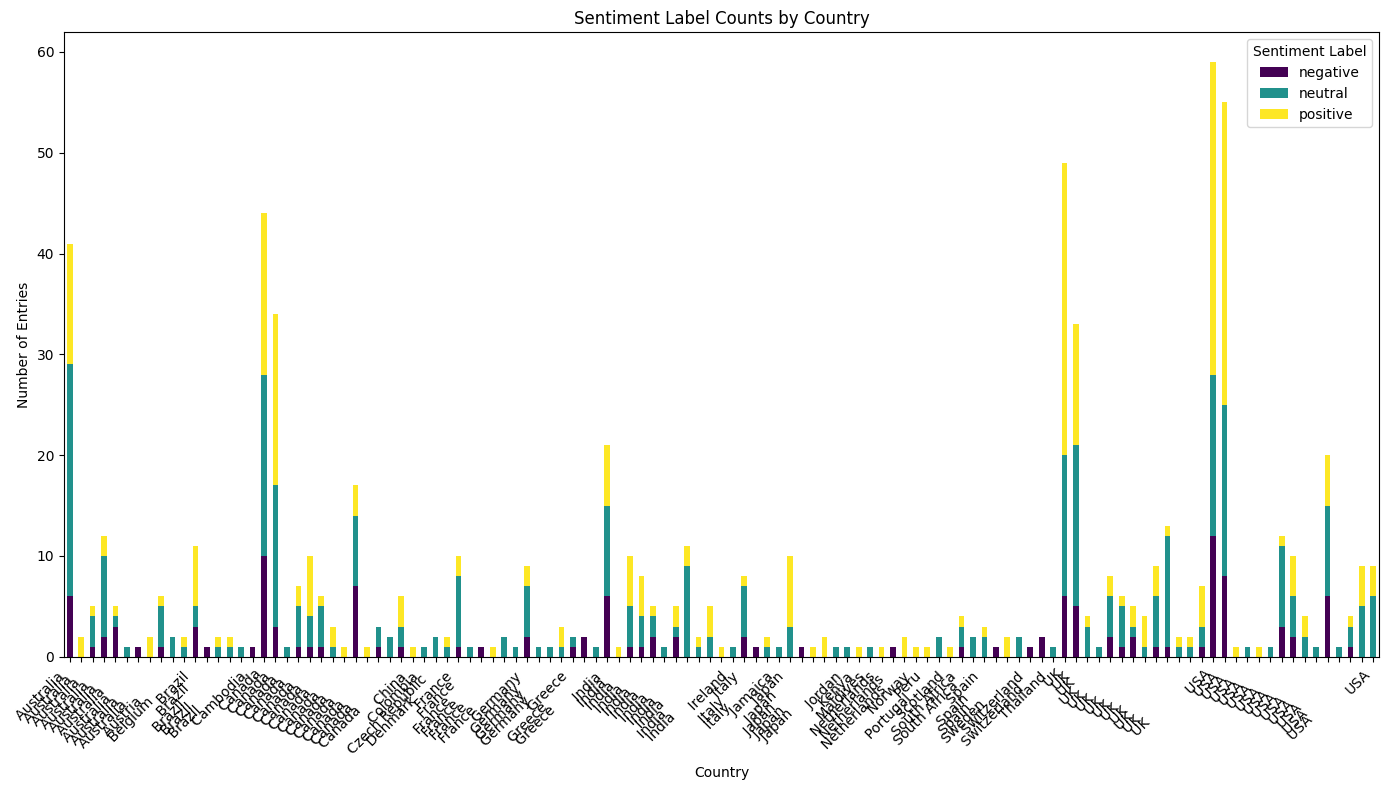

In [8]:

# Check if 'Country' column exists
if 'Country' in df.columns:
  # Group by Country and calculate the mean sentiment score and count of each sentiment label
  country_sentiment = df.groupby('Country')['sentiment_score'].mean().reset_index()
  country_sentiment_counts = df.groupby(['Country', 'sentiment_label']).size().unstack(fill_value=0).reset_index()

  print("\nMean Sentiment Score by Country:")
  print(country_sentiment)

  print("\nSentiment Label Counts by Country:")
  print(country_sentiment_counts)

  # Plot the mean sentiment score by country
  plt.figure(figsize=(12, 7))
  sns.barplot(x='Country', y='sentiment_score', data=country_sentiment, palette='coolwarm')
  plt.title('Mean Sentiment Score by Country')
  plt.xlabel('Country')
  plt.ylabel('Mean Sentiment Score')
  plt.ylim(-0.5, 0.5) # Adjust limits based on expected scores
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

  # Plot the sentiment label counts by country
  country_sentiment_counts.set_index('Country').plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
  plt.title('Sentiment Label Counts by Country')
  plt.xlabel('Country')
  plt.ylabel('Number of Entries')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Sentiment Label')
  plt.tight_layout()
  plt.show()
else:
  print("\n'Country' column not found in the DataFrame.")

In [11]:
# prompt: hashtag word count

from collections import Counter

# Count the occurrences of each hashtag
hashtag_counts = Counter(all_hashtags)

# Print the most common hashtags
print("\nMost Common Hashtags:")
for hashtag, count in hashtag_counts.most_common(20): # Display the top 20
    print(f"#{hashtag}: {count}")

# Optional: Plot a bar chart of the most common hashtags
if hashtag_counts:
    most_common_hashtags = hashtag_counts.most_common(20)
    hashtags_df = pd.DataFrame(most_common_hashtags, columns=['Hashtag', 'Count'])

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Count', y='Hashtag', data=hashtags_df, palette='viridis')
    plt.title('Top 20 Most Common Hashtags')
    plt.xlabel('Count')
    plt.ylabel('Hashtag')
    plt.tight_layout()
    plt.show()
else:
    print("No hashtags found to count.")


Most Common Hashtags:
No hashtags found to count.


In [9]:
df.to_excel('processed_sentiment_data.xlsx', index=False)
